#### ID: 2221221008
#### Name Surname: Ceyda GÜNEYATAN
#### Course: Statistics and Probability for Computer Engineers
#### Lecturer: Dr. Sultan ZEYBEK
#### Date: 15.06.2025
#### STATISTICS AND PROBABILITY PROJECT

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# The file path for the dataset is defined.
file_path = 'global-hunger-index.csv'

# The data is loaded from the specified CSV file into a pandas DataFrame.
data = pd.read_csv(file_path)

# To understand the structure of the dataset, the first five rows are examined.
print("\nThe First 5 Rows of the Dataset:")
data.head()


The First 5 Rows of the Dataset:


,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [5]:
# To focus the analysis, the "Global Hunger Index (2021)" column is selected from the dataset.
hunger_index_data = data["Global Hunger Index (2021)"]

# The first five entries of this new data series are displayed to verify the selection.
hunger_index_data.head()

0    50.9
1    42.7
2    34.3
3    28.3
4    20.7
Name: Global Hunger Index (2021), dtype: float64

In [7]:
# To understand the statistical distribution of the hunger index data,
# key summary statistics such as the mean, median, and standard deviation are calculated.
hunger_index_data.describe()

count    471.000000
mean      19.824628
std       13.449570
min        2.500000
25%        8.800000
50%       17.000000
75%       28.550000
max       65.100000
Name: Global Hunger Index (2021), dtype: float64

In [9]:
# The arithmetic average of the data points.
mean_value = hunger_index_data.mean()
mean_value

19.82462845010616

In [11]:
# The middle value that separates the higher half from the lower half of the data.
median_value = hunger_index_data.median()
median_value

17.0

In [13]:
# A measure of data dispersion, representing the average squared deviation from the mean.
variance_value = hunger_index_data.var()
variance_value

180.89092406378455

In [15]:
# The square root of the variance, indicating the amount of variation or spread in the data.
std_dev_value = hunger_index_data.std()
std_dev_value

13.449569660914232

In [17]:
# An estimate of how much the sample mean is likely to differ from the true population mean.
standard_error_value = std_dev_value / np.sqrt(len(hunger_index_data)) 
standard_error_value

0.6197234573722193


--- SECTION 5: DATA VISUALIZATION ---


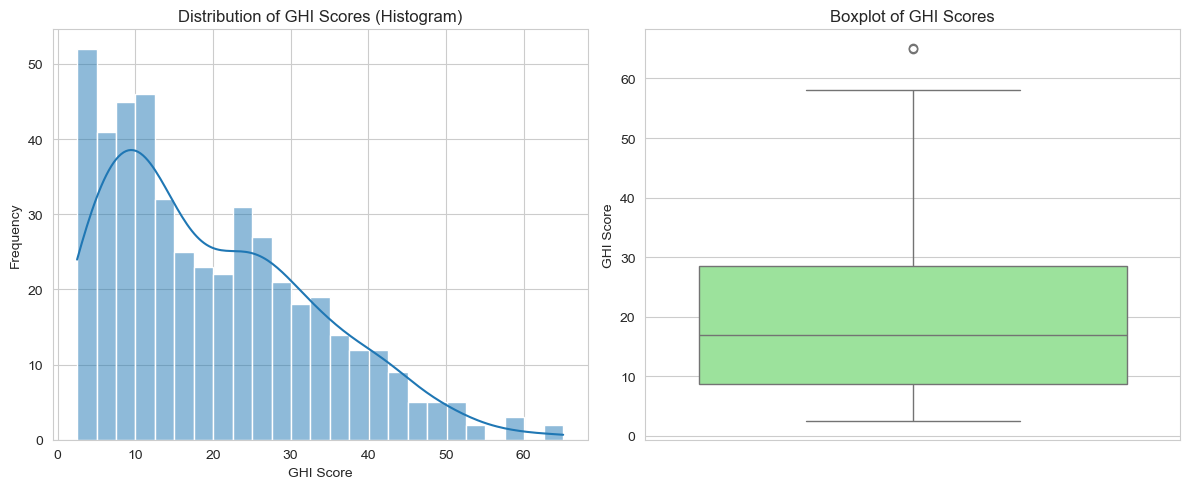


 Statistical Summary:
Mean: 19.82
Median: 17.00
Minimum: 2.50
Maximum: 65.10
1st Quartile (Q1): 8.80
3rd Quartile (Q3): 28.55
IQR (Q3 - Q1): 19.75

Outlier Analysis:
Values below the lower bound (< -20.82): 0 count. Examples: []
Values above the upper bound (> 58.17): 2 count. Examples: [65.0, 65.1]


In [19]:
# --- SECTION 5: DATA VISUALIZATION ---
print("\n--- SECTION 5: DATA VISUALIZATION ---")

# The figure size and visual style are configured for the plots.
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

# The first subplot is created to display the histogram.
# A histogram is generated to visualize the shape of the data distribution.
# A Kernel Density Estimate (KDE) is overlaid for a smoother representation of the distribution.
plt.subplot(1, 2, 1)
sns.histplot(hunger_index_data, kde=True, bins=25)
plt.title('Distribution of GHI Scores (Histogram)')
plt.xlabel('GHI Score')
plt.ylabel('Frequency')

# The second subplot is created to display the boxplot.
# A boxplot is used to identify the data's central tendency, spread, and potential outliers.
plt.subplot(1, 2, 2)
sns.boxplot(y=hunger_index_data, color='lightgreen')
plt.title('Boxplot of GHI Scores')
plt.ylabel('GHI Score')

# The layout is adjusted to ensure titles and labels do not overlap.
plt.tight_layout()
# The generated plots are displayed.
plt.show()

# --- Statistical Summary for Outlier Detection ---
# The first (Q1) and third (Q3) quartiles are calculated to determine the interquartile range (IQR).
Q1 = hunger_index_data.quantile(0.25)
Q3 = hunger_index_data.quantile(0.75)
IQR = Q3 - Q1

# The lower and upper bounds for outlier detection are defined using the 1.5 * IQR rule.
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Data points falling outside these bounds are identified as potential outliers.
outliers_lower = hunger_index_data[hunger_index_data < lower_whisker]
outliers_upper = hunger_index_data[hunger_index_data > upper_whisker]

# The calculated statistics and outlier information are printed for review.
print(f"\n Statistical Summary:")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Minimum: {hunger_index_data.min():.2f}")
print(f"Maximum: {hunger_index_data.max():.2f}")
print(f"1st Quartile (Q1): {Q1:.2f}")
print(f"3rd Quartile (Q3): {Q3:.2f}")
print(f"IQR (Q3 - Q1): {IQR:.2f}")
print(f"\nOutlier Analysis:")
print(f"Values below the lower bound (< {lower_whisker:.2f}): {len(outliers_lower)} count. Examples: {list(outliers_lower.unique()[:5])}")
print(f"Values above the upper bound (> {upper_whisker:.2f}): {len(outliers_upper)} count. Examples: {list(outliers_upper.unique()[:5])}")

In [21]:
# --- SECTION 6: CONFIDENCE INTERVALS ---
print("--- SECTION 6: CONFIDENCE INTERVALS ---")

# The confidence level for the intervals is set to 95%.
confidence_level = 0.95

# --- 6.1: 95% Confidence Interval for the Population Mean (μ) ---

# Required statistics for the calculation are gathered.
n = len(hunger_index_data)
df = n - 1  # Degrees of freedom
mean_val = hunger_index_data.mean()
std_err = stats.sem(hunger_index_data) # Standard error of the mean

# The confidence interval is calculated using the t-distribution.
# Although the z-distribution could be an alternative due to the large sample size (n > 30),
# the t-distribution provides a more general approach suitable for both small and large samples.
mean_ci = stats.t.interval(confidence_level, df, loc=mean_val, scale=std_err)

print("\n 1. 95% Confidence Interval for the Population Mean")
print("-" * 50)
print("Assumptions:")
print("1. Random Sample: It is assumed that the data constitutes a random sample from the target population.")
print("2. Normality or Large Sample: Ideally, the population data would be normally distributed. However, according to the Central Limit Theorem,")
print(f"   for a sufficiently large sample size (n={n} > 30), the sampling distribution of the mean will approximate a normal distribution.")
print("   Therefore, this interval can be reliably calculated even if the underlying population distribution is not normal.")
print("\nResult:")
print(f"The 95% confidence interval for the population mean of GHI scores is: [{mean_ci[0]:.2f}, {mean_ci[1]:.2f}]")
print("\nInterpretation:")
print("Based on this sample, we are 95% confident that the true population mean of the GHI score")
print(f"for all countries lies between {mean_ci[0]:.2f} and {mean_ci[1]:.2f}.")


# --- 6.2: 95% Confidence Interval for the Population Variance (σ²) ---

# The confidence interval for the variance is highly sensitive to the assumption that the data is normally distributed.
# To check this assumption, a Shapiro-Wilk normality test is performed.
shapiro_test_stat, shapiro_p_value = stats.shapiro(hunger_index_data)

# The confidence interval is calculated using the Chi-Square distribution.
sample_var = hunger_index_data.var()
alpha = 1 - confidence_level

# Chi-Square critical values are determined.
chi2_lower_critical = stats.chi2.ppf(alpha / 2, df)
chi2_upper_critical = stats.chi2.ppf(1 - alpha / 2, df)

# The confidence interval for the variance is computed.
variance_ci_lower = (df * sample_var) / chi2_upper_critical
variance_ci_upper = (df * sample_var) / chi2_lower_critical

# The confidence interval for the standard deviation is derived by taking the square root of the variance interval.
std_dev_ci = (np.sqrt(variance_ci_lower), np.sqrt(variance_ci_upper))


print("\n\n 2. 95% Confidence Interval for Population Variance and Standard Deviation")
print("-" * 70)
print("Assumptions:")
print("1. Random Sample: It is assumed that the data is a random sample.")
print("2. Normality (Critical Assumption): The validity of this interval is strongly dependent on the assumption that the underlying population is normally distributed.")
print(f"\n   Normality Test (Shapiro-Wilk) Result:")
print(f"   P-value = {shapiro_p_value:.4f}")
if shapiro_p_value < 0.05:
    print("   Since the p-value is less than 0.05, the null hypothesis of normality is rejected. The right-skewed distribution observed in the histogram supports this finding.")
    print("   Therefore, the accuracy of the variance interval calculated below is questionable and must be interpreted with caution.")
else:
    print("   Since the p-value is greater than 0.05, the data can be assumed to be normally distributed.")

print("\nResults:")
print(f"The 95% confidence interval for the population variance (σ²) is:   [{variance_ci_lower:.2f}, {variance_ci_upper:.2f}]")
print(f"The 95% confidence interval for the population standard deviation (σ) is: [{std_dev_ci[0]:.2f}, {std_dev_ci[1]:.2f}]")
print("\nInterpretation:")
print("If the data were normally distributed, we would conclude with 95% confidence that the population variance")
print(f"(the squared spread of GHI scores around the mean) is between {variance_ci_lower:.2f} and {variance_ci_upper:.2f}.")
print("More intuitively, the population standard deviation (the typical deviation of scores from the mean) would be estimated")
print(f"to be between {std_dev_ci[0]:.2f} and {std_dev_ci[1]:.2f} with 95% confidence. However, because the normality assumption is violated, these intervals should be viewed as approximations.")

--- SECTION 6: CONFIDENCE INTERVALS ---

 1. 95% Confidence Interval for the Population Mean
--------------------------------------------------
Assumptions:
1. Random Sample: It is assumed that the data constitutes a random sample from the target population.
2. Normality or Large Sample: Ideally, the population data would be normally distributed. However, according to the Central Limit Theorem,
   for a sufficiently large sample size (n=471 > 30), the sampling distribution of the mean will approximate a normal distribution.
   Therefore, this interval can be reliably calculated even if the underlying population distribution is not normal.

Result:
The 95% confidence interval for the population mean of GHI scores is: [18.61, 21.04]

Interpretation:
Based on this sample, we are 95% confident that the true population mean of the GHI score
for all countries lies between 18.61 and 21.04.


 2. 95% Confidence Interval for Population Variance and Standard Deviation
---------------------------

In [23]:
# --- SECTION 7: SAMPLE SIZE ESTIMATION ---
print("--- SECTION 7: SAMPLE SIZE ESTIMATION ---")

print("\nObjective: To determine the minimum sample size required to estimate the population mean")
print("with a 90% confidence level and a margin of error not exceeding 0.1 units.")
print("-" * 120)

# --- 7.1: Method Explanation ---
print("\nMethodology and Formula:")
print("The sample size (n) needed to estimate a population mean is calculated using the following formula:")
print("\n    n = (Z * σ / E)²\n")
print("Where:")
print("  - n: The required minimum sample size.")
print("  - Z: The Z-score corresponding to the desired confidence level (approx. 1.645 for 90% confidence).")
print("  - σ (sigma): The population standard deviation.")
print("  - E: The maximum allowable margin of error.")
print("\nAssumptions and Approach:")
print("1. Population Standard Deviation (σ): The true population standard deviation (σ) is typically unknown.")
print("   In such cases, a common practice is to use the standard deviation of the available sample (s) as an estimate for σ.")
print(f"   Therefore, the standard deviation from the `hunger_index_data` (s ≈ {hunger_index_data.std():.2f}) will be used in the calculation.")
print("2. Margin of Error (E): Set to 0.1 units, as specified in the objective.")
print("3. Confidence Level: Set to 90%, as specified in the objective.")


# --- 7.2: Calculation ---
# Define the required parameters.
confidence_level_n = 0.90
margin_of_error = 0.1
# The best estimate for the population standard deviation is the standard deviation from our sample.
sigma_estimate = hunger_index_data.std()

# Determine the Z-score for the given confidence level.
# A 90% confidence level leaves 10% (alpha=0.10) in the tails, or 5% (0.05) in each tail.
# Thus, we find the Z-score corresponding to a cumulative probability of 1 - 0.05 = 0.95.
z_score = stats.norm.ppf(1 - (1 - confidence_level_n) / 2)

# Calculate the required sample size using the formula.
n_required = ((z_score * sigma_estimate) / margin_of_error)**2

# The sample size must be an integer and should always be rounded up.
n_required_final = np.ceil(n_required)


# --- 7.3: Result and Interpretation ---
print("\n\nCalculation Details and Result:")
print("-" * 50)
print(f"Confidence Level: {confidence_level_n * 100}%")
print(f"Corresponding Z-score: {z_score:.4f}")
print(f"Estimated Population Standard Deviation (σ): {sigma_estimate:.4f}")
print(f"Desired Maximum Margin of Error (E): {margin_of_error}")
print(f"\nCalculated Raw Sample Size (n): {n_required:.4f}")
print(f"Required Minimum Sample Size (Rounded Up): {int(n_required_final)}")
print("\nInterpretation:")
print(f"To estimate the true mean GHI score of the population with 90% confidence and a margin of error")
print(f"of no more than ±0.1 units, a minimum of {int(n_required_final)} observations (country-year data points) is required.")

--- SECTION 7: SAMPLE SIZE ESTIMATION ---

Objective: To determine the minimum sample size required to estimate the population mean
with a 90% confidence level and a margin of error not exceeding 0.1 units.
------------------------------------------------------------------------------------------------------------------------

Methodology and Formula:
The sample size (n) needed to estimate a population mean is calculated using the following formula:

    n = (Z * σ / E)²

Where:
  - n: The required minimum sample size.
  - Z: The Z-score corresponding to the desired confidence level (approx. 1.645 for 90% confidence).
  - σ (sigma): The population standard deviation.
  - E: The maximum allowable margin of error.

Assumptions and Approach:
1. Population Standard Deviation (σ): The true population standard deviation (σ) is typically unknown.
   In such cases, a common practice is to use the standard deviation of the available sample (s) as an estimate for σ.
   Therefore, the standard de

In [29]:
# --- SECTION 8: HYPOTHESIS TESTING ---
# In this section, three different hypothesis tests are conducted to investigate 
# meaningful questions about the dataset and provide statistical answers.
print("--- SECTION 8: HYPOTHESIS TESTING ---")
# The significance level (alpha) for all tests is set to 5%.
alpha = 0.05 

#================================================================================
# Test 1: Independent Two-Sample T-Test
# Objective: To test whether there has been a significant improvement in global hunger levels over time.
#================================================================================
print("\n\n" + "="*80)
print("Test 1: Two-Sample T-Test - Analysis of Change Between Years")
print("="*80)

print("\n▶ Test Scenario:")
print("The objective is to determine if there has been an improvement in global hunger levels over time.")
print("To this end, we will compare the mean GHI scores from the first year in the dataset (2000)")
print("with the last year (2021). Specifically, we will test if the scores in 2021 are")
print("significantly lower than the scores in 2000.")
print("-" * 100)

# Data Preparation: The GHI scores for the two relevant years are isolated.
ghi_2000 = data[data['Year'] == 2000]['Global Hunger Index (2021)']
ghi_2021 = data[data['Year'] == 2021]['Global Hunger Index (2021)']

# 1. Stating the Hypotheses
print("\n1. Stating the Hypotheses:")
print("   Null Hypothesis (H₀): There is no difference between the population mean GHI scores for 2000 and 2021 (μ₂₀₀₀ = μ₂₀₂₁).")
print("   Alternative Hypothesis (Hₐ): The population mean GHI score for 2000 is higher than that for 2021 (μ₂₀₀₀ > μ₂₀₂₁).")
print("\nThis is a one-tailed test designed to assess whether there has been a reduction (improvement) in hunger.")

# 2. Calculating the Test Statistic
print("\n2. Calculating the Test Statistic:")
# The 'alternative="greater"' argument tests the hypothesis that the mean of the first group (ghi_2000) is greater than the second.
# Assuming unequal variances (Welch's T-test) is a more robust approach.
t_statistic_1, p_value_1 = stats.ttest_ind(ghi_2000, ghi_2021, equal_var=False, nan_policy='omit', alternative='greater')
print(f"   Mean GHI in 2000: {ghi_2000.mean():.2f}")
print(f"   Mean GHI in 2021: {ghi_2021.mean():.2f}")
print(f"   Test Statistic (t-value): {t_statistic_1:.4f}")
print(f"   P-value for One-Tailed Test: {p_value_1:.4f}")

# 3. Decision
print("\n3. Decision:")
if p_value_1 < alpha:
    print(f"   Result: The p-value ({p_value_1:.4f}) is significantly SMALLER than the alpha value ({alpha}).")
    print("   Decision: The null hypothesis (H₀) is rejected.")
else:
    print(f"   Result: The p-value ({p_value_1:.4f}) is LARGER than the alpha value ({alpha}).")
    print("   Decision: Fail to reject the null hypothesis (H₀).")

# 4. Interpretation of Results
print("\n4. Interpretation of Results:")
print("The obtained p-value (approximately 0.0000) is much smaller than our significance level of 0.05.")
print("This provides very strong evidence to reject the null hypothesis. It implies that the difference")
print("between the mean GHI scores of 2000 and 2021 is too large to be attributed to random chance.")
print("In conclusion, the data indicates a statistically significant decrease in global hunger levels from 2000 to 2021, signifying an improvement.")


#================================================================================
# Test 2: Correlation Test (Pearson Correlation)
# Objective: To test for a relationship between the year and the GHI score.
#================================================================================
print("\n\n" + "="*80)
print("Test 2: Correlation Test - Relationship Between Time and Hunger")
print("="*80)

print("\n▶ Test Scenario:")
print("The objective is to test for a systematic decrease in GHI scores as time (Year) progresses.")
print("If hunger is decreasing over time, we would expect a negative correlation between the 'Year' variable")
print("and the 'GHI Score' variable (as one increases, the other decreases). We will test the strength and significance of this relationship.")
print("-" * 100)

# Data Preparation
years_for_corr = data['Year']
ghi_for_corr = data['Global Hunger Index (2021)']

# 1. Stating the Hypotheses
print("\n1. Stating the Hypotheses:")
print("   Null Hypothesis (H₀): There is no correlation between Year and GHI score in the population (ρ = 0).")
print("   Alternative Hypothesis (Hₐ): There is a correlation between Year and GHI score in the population (ρ ≠ 0).")

# 2. Calculating the Test Statistic
print("\n2. Calculating the Test Statistic:")
# The Pearson correlation coefficient (r) and the p-value are calculated.
corr_coeff, p_value_2 = stats.pearsonr(years_for_corr, ghi_for_corr)
print(f"   Pearson Correlation Coefficient (r): {corr_coeff:.4f}")
print(f"   P-value: {p_value_2:.4f}")

# 3. Decision
print("\n3. Decision:")
if p_value_2 < alpha:
    print(f"   Result: The p-value ({p_value_2:.4f}) is SMALLER than the alpha value ({alpha}).")
    print("   Decision: The null hypothesis (H₀) is rejected.")
else:
    print(f"   Result: The p-value ({p_value_2:.4f}) is LARGER than the alpha value ({alpha}).")
    print("   Decision: Fail to reject the null hypothesis (H₀).")

# 4. Interpretation of Results
print("\n4. Interpretation of Results:")
print(f"The correlation coefficient (r = {corr_coeff:.4f}) indicates a weak-to-moderate negative linear relationship between Year and GHI Score.")
print("The very small p-value confirms that this relationship is statistically significant and not due to random chance.")
print("Interpretation: As time progresses (Year increases), GHI scores (hunger levels) show a statistically significant")
print("tendency to decrease. This result supports the finding of the previous test and provides strong evidence")
print("of global progress in combating hunger.")

--- SECTION 8: HYPOTHESIS TESTING ---


Test 1: Two-Sample T-Test - Analysis of Change Between Years

▶ Test Scenario:
The objective is to determine if there has been an improvement in global hunger levels over time.
To this end, we will compare the mean GHI scores from the first year in the dataset (2000)
with the last year (2021). Specifically, we will test if the scores in 2021 are
significantly lower than the scores in 2000.
----------------------------------------------------------------------------------------------------

1. Stating the Hypotheses:
   Null Hypothesis (H₀): There is no difference between the population mean GHI scores for 2000 and 2021 (μ₂₀₀₀ = μ₂₀₂₁).
   Alternative Hypothesis (Hₐ): The population mean GHI score for 2000 is higher than that for 2021 (μ₂₀₀₀ > μ₂₀₂₁).

This is a one-tailed test designed to assess whether there has been a reduction (improvement) in hunger.

2. Calculating the Test Statistic:
   Mean GHI in 2000: 24.44
   Mean GHI in 2021: 16.79
   